/Users/pauldegoffau/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


<AxesSubplot:>

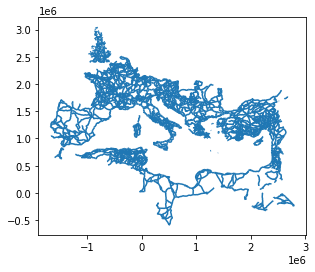

In [1]:
import geopandas as gdp

gdf = gdp.read_file('data/roman_roads_v2008.shx')
gdf.plot()

In [2]:
import momepy
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [15]:
graph = momepy.gdf_to_nx(gdf, approach='primal')
graph = momepy.node_degree(graph, name='degree')

nodes, edges, sw = momepy.nx_to_gdf(graph, points=True, lines=True,
                                    spatial_weights=True)
f, ax = plt.subplots(figsize=(200, 200))
nodes.plot(ax=ax, column='degree', cmap='plasma', markersize=(nodes['degree'] * 100), zorder=2)
edges.plot(ax=ax, color='lightgrey', zorder=1)
ax.set_axis_off()
plt.show()


nodes, edges, sw = momepy.nx_to_gdf(graph, points=True, lines=True,
                                    spatial_weights=True)
nodes = nodes.to_crs(epsg=4326)
nodes['lat'] = nodes['geometry'].y
nodes['lon'] = nodes['geometry'].x

nodes.sort_values('degree')

/Users/pauldegoffau/opt/anaconda3/envs/geo/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 105 disconnected components.
  warnings.warn(message)


/Users/pauldegoffau/opt/anaconda3/envs/geo/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 105 disconnected components.
  warnings.warn(message)


degree  nodeID                   geometry        lat        lon
5121       1    5121   POINT (3.81165 36.22447)  36.224472   3.811649
843        1     843  POINT (15.63195 44.13389)  44.133895  15.631950
4262       1    4262  POINT (22.60443 41.03228)  41.032281  22.604427
4261       1    4261  POINT (23.35418 41.27231)  41.272307  23.354178
4260       1    4260  POINT (22.97691 40.71100)  40.710998  22.976912
...      ...     ...                        ...        ...        ...
437        7     437   POINT (4.29087 46.99588)  46.995881   4.290866
1191       8    1191   POINT (2.39152 47.09393)  47.093925   2.391517
1186       8    1186   POINT (0.32363 46.57934)  46.579339   0.323626
226        8     226   POINT (0.13752 47.99672)  47.996722   0.137524
2228       8    2228   POINT (8.16680 35.36823)  35.368227   8.166795

[5122 rows x 5 columns]

In [30]:
cities = pd.read_csv('data/Hanson2016_Cities_OxREP.csv',encoding='latin-1')
cities_geo = gpd.GeoDataFrame(
    cities, geometry=gpd.points_from_xy(cities['Longitude (X)'], cities['Latitude (Y)']))

Primary Key          Ancient Toponym Modern Toponym Province  \
0        Hanson2016_1                     Abae       Kalapodi   Achaea   
1        Hanson2016_2                 Acharnae       Acharnes   Achaea   
2        Hanson2016_3                Acraephia      Akraifnio   Achaea   
3        Hanson2016_4                   Aegina         Aigina   Achaea   
4        Hanson2016_5                   Aegira        Aigeira   Achaea   
...               ...                      ...            ...      ...   
1383  Hanson2016_1384                 Pautalia      Kyustendi  Thracia   
1384  Hanson2016_1385  Philippopolis (Thracia)        Plovdiv  Thracia   
1385  Hanson2016_1386               Samothrace     Samothrace  Thracia   
1386  Hanson2016_1387                  Serdica         Sophia  Thracia   
1387  Hanson2016_1388              Seuthopolis       Kazanlak  Thracia   

       Country Barrington Atlas Rank Barrington Atlas Reference  Start Date  \
0       Greece                4 or 5                      55 D3        -600   
1       Greece                     3                      59 B2        -600   
2       Greece                     3                      55 E4        -600   
3       Greece                     2                      59 A3        -600   
4       Greece                     3                      58 C1        -600   
...        ...                   ...                        ...         ...   
1383  Bulgaria                     3                      49 E1          98   
1384  Bulgaria                     2                      22 B6        -342   
1385    Greece                     3                      51 F3        -700   
1386  Bulgaria                     2                      21 F7          45   
1387  Bulgaria                4 or 5                      22 C6        -400   

      End Date  Longitude (X)  Latitude (Y)  \
0          NaN      22.933333     38.583333   
1          NaN      23.734088     38.083473   
2          NaN      23.219702     38.452606   
3          NaN      23.428500     37.750074   
4          NaN      22.355720     38.147951   
...        ...            ...           ...   
1383       NaN      22.680752     42.282517   
1384       NaN      24.750913     42.146652   
1385       NaN      25.529249     40.500693   
1386       NaN      23.342891     42.722826   
1387       NaN      25.274047     42.628866   

                                    Select Bibliography  \
0     BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...   
1                           BNP; DGRG; PECS; Sear 2006.   
2     BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...   
3     BNP; DGRG; Hansen 2006; Hansen and Nielsen 200...   
4                        DGRG; Hansen and Nielsen 2004.   
...                                                 ...   
1383         BNP; DGRG; Jones 1937; PECS; Wilkes 2003b.   
1384  BNP; Cohen 1995; DGRG; Hansen and Nielsen 2004...   
1385  BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...   
1386  BNP; DGRG; Jones 1937; PECS; Sear 2006; Wilkes...   
1387  BNP; Cohen 1995; Hansen and Nielsen 2004; PECS...   

                       geometry  
0     POINT (22.93333 38.58333)  
1     POINT (23.73409 38.08347)  
2     POINT (23.21970 38.45261)  
3     POINT (23.42850 37.75007)  
4     POINT (22.35572 38.14795)  
...                         ...  
1383  POINT (22.68075 42.28252)  
1384  POINT (24.75091 42.14665)  
1385  POINT (25.52925 40.50069)  
1386  POINT (23.34289 42.72283)  
1387  POINT (25.27405 42.62887)  

[1388 rows x 13 columns]

In [43]:
nodes_j = nodes.sjoin_nearest(cities_geo)

/Users/pauldegoffau/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:2050: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin_nearest(
/Users/pauldegoffau/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/array.py:341: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [51]:
nodes_j

degree  nodeID                                         geometry  \
0          3       0  POINT (12.5278732159638118 41.5741396911357199)   
1          3       1  POINT (12.5353804776567497 41.5658851956998774)   
2          3       2  POINT (12.5526042372485129 41.5459360650206335)   
47         3      47  POINT (12.5071181542959344 41.5818328553588685)   
48         3      48  POINT (12.5114587855354902 41.5784052496007774)   
...      ...     ...                                              ...   
5033       3    5033  POINT (34.1235666718021449 37.0355185632717365)   
5047       1    5047   POINT (5.3820232302857640 44.7553635750439511)   
5048       3    5048   POINT (5.6282002107345024 44.8856722058924333)   
5084       1    5084  POINT (-8.5892679035034867 37.1669173650990459)   
5085       1    5085  POINT (-2.7428266240955432 39.9968737577112918)   

            lat        lon  index_right      Primary Key  \
0     41.574140  12.527873          747   Hanson2016_748   
1     41.565885  12.535380          747   Hanson2016_748   
2     41.545936  12.552604          747   Hanson2016_748   
47    41.581833  12.507118          747   Hanson2016_748   
48    41.578405  12.511459          747   Hanson2016_748   
...         ...        ...          ...              ...   
5033  37.035519  34.123567          454   Hanson2016_455   
5047  44.755364   5.382023          643   Hanson2016_644   
5048  44.885672   5.628200          643   Hanson2016_644   
5084  37.166917  -8.589268         1089  Hanson2016_1090   
5085  39.996874  -2.742827          727   Hanson2016_728   

              Ancient Toponym     Modern Toponym  \
0                       Ardea              Ardea   
1                       Ardea              Ardea   
2                       Ardea              Ardea   
47                      Ardea              Ardea   
48                      Ardea              Ardea   
...                       ...                ...   
5033                     Olba              U?ura   
5047  Dea Augusta Vocontiorum                Die   
5048  Dea Augusta Vocontiorum                Die   
5084                 Ossonoba               Faro   
5085                Segobriga  Cabezo del Griego   

                            Province   Country Barrington Atlas Rank  \
0     Italia (I Latium and Campania)     Italy                     3   
1     Italia (I Latium and Campania)     Italy                     3   
2     Italia (I Latium and Campania)     Italy                     3   
47    Italia (I Latium and Campania)     Italy                     3   
48    Italia (I Latium and Campania)     Italy                     3   
...                              ...       ...                   ...   
5033               Cilicia et Cyprus    Turkey                4 or 5   
5047              Gallia Narbonensis    France                     3   
5048              Gallia Narbonensis    France                     3   
5084                       Lusitania  Portugal                     3   
5085          Hispania Tarraconensis     Spain                4 or 5   

     Barrington Atlas Reference  Start Date  End Date  Longitude (X)  \
0                         43 C3        -500       1.0      12.510598   
1                         43 C3        -500       1.0      12.510598   
2                         43 C3        -500       1.0      12.510598   
47                        43 C3        -500       1.0      12.510598   
48                        43 C3        -500       1.0      12.510598   
...                         ...         ...       ...            ...   
5033                      66 D3        -323       NaN      33.956686   
5047                      17 E4         -27       NaN       5.370462   
5048                      17 E4         -27       NaN       5.370462   
5084                      26 C4         -50       NaN      -7.935108   
5085                      27 C2         -50       NaN      -2.813020   

      Latitude (Y)                                Sel

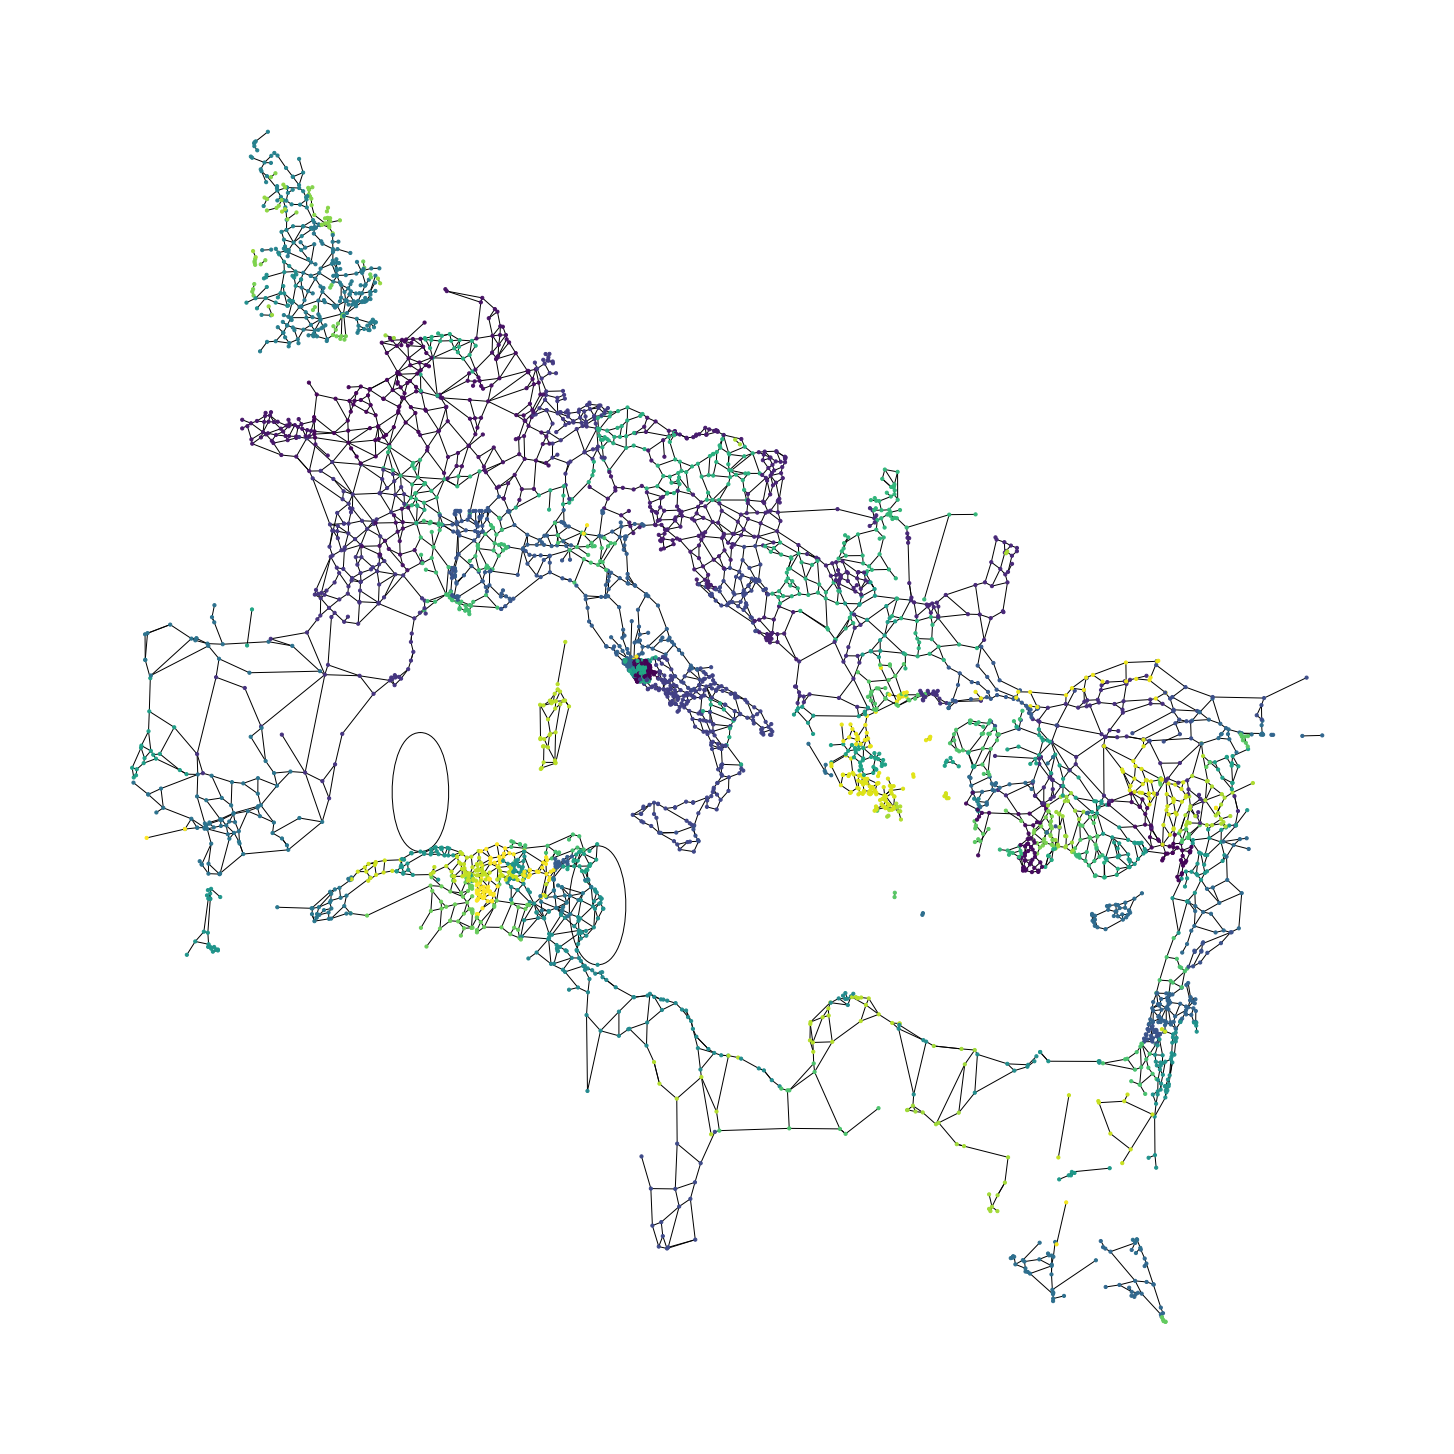

In [49]:
import networkx.algorithms.community as nx_comm
import matplotlib.pylab as pl

communities = nx_comm.louvain_communities(graph,weight='mm_len', seed=123, resolution = 10)

coordinates = np.column_stack((nodes.geometry.x, nodes.geometry.y))
positions = dict(zip(graph.nodes, coordinates))

community_map = {}
for i,community in enumerate(communities) :
    for node in community :
        community_map[node] = i

colors = []
for node in graph :
    colors.append(community_map.get(node))
    
f= plt.figure(figsize=(20, 20))    
nx.draw(graph, positions, node_size=10, node_color=colors,vmin=min(colors), vmax=max(colors), cmap=pl.get_cmap("viridis"))
pl.axis("off")
pl.show()